In [2]:
# import sys
# sys.path.insert(1, '..')
from MDSplus import *
import database
import plasma
import matplotlib.pyplot as plt
import importlib
importlib.reload(database)
importlib.reload(plasma)

<module 'plasma' from '/home/hmturner/Documents/disruption-warning-db-workflow/src/plasma.py'>

In [3]:
data_handler = database.DatabaseHandler.create_cmod_handler()
disruptions_df = data_handler.query("select * from disruption_warning order by time",use_pandas=True)
grouped_df = disruptions_df.groupby(by=["shot"])

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [8]:
grouped_df = disruptions_df.drop(columns=['commit_hash']).groupby(by=["shot"])

In [12]:
percent_missing = grouped_df.apply(lambda group: group.isnull().sum()*100/len(group))

In [15]:
percent_none= grouped_df.apply(lambda group: (group==None).sum()*100/len(group))
percent_none

,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Mirnov_norm_bpol,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA
shot,,,,,,,,,,,,,,,,,,,,,
1050204013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1050207022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1160930037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160930038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1160930039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Mirnov_norm_bpol,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA
count,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,...,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0,10435.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Using the data handler

In [115]:
disruption_shots

,shot,t_disrupt
0,930519014,0.1240
1,930519019,0.1130
2,930519027,0.1210
3,930519028,0.1275
4,930520004,0.1195
...,...,...
13780,1160930037,1.6529
13781,1160930038,1.4175
13782,1160930039,1.3723
13783,1160930040,1.4963


In [138]:
na_value_dict = {}
for disruption_shot in disruption_shots['shot'][13000:13020]:
    try:
        shot = test_handler.get_shot(disruption_shot)
        n = len(shot.data)
        # for col in shot.data.columns[shot.data.isna().any()].tolist():
            
        #     if col not in na_value_dict:
        #         na_value_dict[col] = 0
        #     na_value_dict[col]+=1
        print(pd.unique(shot.data['intentional_disruption']))
    except Exception as e:
        print(f"Bad shot_id:{disruption_shot} with error:{e}")

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


[0]


/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


KeyboardInterrupt: 

In [127]:
print(na_value_dict)

{'ip_error': 20, 'beta_n': 7, 'v_z': 20, 'z_times_v_z': 20, 'pressure_peaking': 20, 'H98': 20, 'v_0': 20, 'v_mid': 20, 'v_edge': 20, 'power_supply_railed': 20, 'r_dd': 20, 'dipprog_dt': 20, 'v_0_uncalibrated': 20, 'Te_width': 20, 'Greenwald_fraction': 20, 'Te_width_ECE': 20, 'Mirnov_norm_bpol': 20, 'Te_peaking': 20, 'ne_peaking': 20, 'Te_peaking_ECE': 20, 'SXR_peaking': 20, 'Prad_peaking_CVA': 20, 'commit_hash': 20, 'SXR': 19, 'n_over_ncrit': 2, 'kappa_area': 3, 'Mirnov': 1, 'Mirnov_norm_btor': 1}


In [131]:
    test_handler = database.DatabaseHandler.create_cmod_handler()
    disruption_shots = test_handler.get_disruption_shotlist()
    test_shot = test_handler.get_shot('1150922001') # Make default time sorted 
    test_shot.data.sort_values('time')

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA,commit_hash
22,21457,1150922001,0.06,None,NaN,6.260080e+06,-0.659388,-0.728985,1.882671,0.001876,...,NaN,NaN,NaN,NaN,1.079643,233.430786,None,2.794032,None,None
23,21458,1150922001,0.08,None,NaN,5.876882e+06,-0.226697,-0.308375,1.178092,0.001802,...,1.706439,1.236412,NaN,1.119683,1.168232,848.607849,None,4.332554,None,None
24,21459,1150922001,0.10,None,38626.742188,1.954519e+06,-0.161906,-0.261717,1.082136,0.001470,...,1.867273,1.312129,NaN,0.954083,1.198124,631.827820,None,5.619932,None,None
25,21460,1150922001,0.12,None,71370.562500,1.568255e+06,-0.097981,-0.171079,1.140980,0.001129,...,1.880445,1.254971,NaN,1.425348,1.206939,885.036987,None,5.894803,None,None
26,21461,1150922001,0.14,None,65597.859375,1.568518e+06,-0.034526,-0.059190,1.103502,0.000950,...,1.878983,1.275530,NaN,1.894669,1.283828,1013.405640,None,7.039805,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21547,1150922001,1.86,None,32055.292969,-3.915295e+06,0.231375,0.262650,2.017792,0.001190,...,2.114029,1.579198,NaN,3.369444,1.067568,1419.819458,None,4.047672,None,None
21,21548,1150922001,1.88,None,36744.421875,-3.915283e+06,0.279115,0.283441,2.099032,0.001027,...,2.181770,1.457272,NaN,1.955735,1.080388,1062.456055,None,3.460459,None,None
92,21549,1150922001,1.90,None,41582.101562,-3.917811e+06,0.293912,0.257522,2.316430,0.001089,...,NaN,NaN,NaN,1.939786,1.096449,1074.303589,None,2.963748,None,None
93,21550,1150922001,1.92,None,46737.914062,-3.143697e+06,0.335550,0.248984,2.489523,0.001094,...,NaN,NaN,NaN,2.386167,1.114573,861.042969,None,2.461802,None,None


In [137]:
import pandas as pd
pd.unique(test_shot.data['intentional_disruption'])

array([0])

In [107]:
test_handler.query("select * from disruption_warning where shot = 1150922001 order by time",use_pandas=True)

/home/hmturner/.local/lib/python3.8/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,dbkey,shot,time,time_until_disrupt,ip_error,dip_dt,beta_p,beta_n,li,n_equal_1_normalized,...,Te_peaking,ne_peaking,Te_peaking_ECE,SXR_peaking,kappa_area,I_efc,SXR,H_alpha,Prad_peaking_CVA,commit_hash
0,21457,1150922001,0.06,None,NaN,6.260080e+06,-0.659388,-0.728985,1.882671,0.001876,...,NaN,NaN,NaN,NaN,1.079643,233.430786,None,2.794032,None,None
1,21458,1150922001,0.08,None,NaN,5.876882e+06,-0.226697,-0.308375,1.178092,0.001802,...,1.706439,1.236412,NaN,1.119683,1.168232,848.607849,None,4.332554,None,None
2,21459,1150922001,0.10,None,38626.742188,1.954519e+06,-0.161906,-0.261717,1.082136,0.001470,...,1.867273,1.312129,NaN,0.954083,1.198124,631.827820,None,5.619932,None,None
3,21460,1150922001,0.12,None,71370.562500,1.568255e+06,-0.097981,-0.171079,1.140980,0.001129,...,1.880445,1.254971,NaN,1.425348,1.206939,885.036987,None,5.894803,None,None
4,21461,1150922001,0.14,None,65597.859375,1.568518e+06,-0.034526,-0.059190,1.103502,0.000950,...,1.878983,1.275530,NaN,1.894669,1.283828,1013.405640,None,7.039805,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,21547,1150922001,1.86,None,32055.292969,-3.915295e+06,0.231375,0.262650,2.017792,0.001190,...,2.114029,1.579198,NaN,3.369444,1.067568,1419.819458,None,4.047672,None,None
91,21548,1150922001,1.88,None,36744.421875,-3.915283e+06,0.279115,0.283441,2.099032,0.001027,...,2.181770,1.457272,NaN,1.955735,1.080388,1062.456055,None,3.460459,None,None
92,21549,1150922001,1.90,None,41582.101562,-3.917811e+06,0.293912,0.257522,2.316430,0.001089,...,NaN,NaN,NaN,1.939786,1.096449,1074.303589,None,2.963748,None,None
93,21550,1150922001,1.92,None,46737.914062,-3.143697e+06,0.335550,0.248984,2.489523,0.001094,...,NaN,NaN,NaN,2.386167,1.114573,861.042969,None,2.461802,None,None


In [103]:
test_handler.add_column("test_column")
test_handler.remove_column("test_column")

1

In [104]:
test_handler.remove_column("commit_hash")
test_handler.add_column("commit_hash")

ERROR: PROTECTED COLUMN
ERROR: PROTECTED COLUMN


1

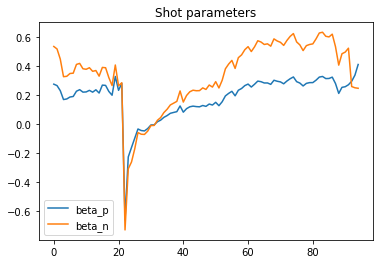

In [108]:
plt.figure()
plt.title('Shot parameters')
plt.plot(test_shot['beta_p'],label='beta_p')
plt.plot(test_shot['beta_n'],label='beta_n')
plt.legend()

In [16]:
disruption_shots

,shot,t_disrupt
0,930519014,0.1240
1,930519019,0.1130
2,930519027,0.1210
3,930519028,0.1275
4,930520004,0.1195
...,...,...
13780,1160930037,1.6529
13781,1160930038,1.4175
13782,1160930039,1.3723
13783,1160930040,1.4963


# Using the shot class

In [97]:
importlib.reload(database)
importlib.reload(plasma)

<module 'plasma' from '/home/hmturner/Documents/disruption-warning-db-workflow/src/plasma.py'>

In [109]:
shot = plasma.Shot('cmod', 1150922003)
shot.data.head()

[]


,times,commit_hash,time_until_disrupt,ip,dip,dip_smoothed,p_ohm,v_loop,p_rad,dprad,...,li,li_dot,q0,qstar,q95,V_loop_efit,Wmhd,dWmhd_dt,ssep,n_over_ncrit
0,0.06,b'2889acf',99.94,379428.286756,5.086012e+06,7.117843e+06,8.523934e+05,6.275818,36.078143,8264.159600,...,1.324928,-13.832802,1.103685,7.225568,6.607815,4.435821,-14118.596680,161908.890338,40.0,-0.171997
1,0.08,b'2889acf',99.92,492632.265113,4.303332e+06,4.482149e+06,1.481806e+06,5.015405,45.045650,-22496.694905,...,1.048272,-8.635894,1.169999,6.226997,5.840223,4.206137,-10880.418945,208832.283909,40.0,-0.360894
2,0.10,b'2889acf',99.90,588766.937072,4.694608e+06,3.275136e+06,1.701605e+06,4.260742,56.045170,3420.241649,...,0.979492,1.039714,1.272354,5.337955,4.971719,3.831973,-5765.307617,65393.711775,40.0,-0.354670
3,0.12,b'2889acf',99.88,650610.449165,2.348554e+06,7.806548e+05,2.266174e+06,3.846663,77.300026,7136.922087,...,1.089860,2.438531,1.131293,5.110583,4.661230,3.498237,-8264.672852,40371.270695,40.0,-0.360272
4,0.14,b'2889acf',99.86,678789.171658,3.520680e+06,1.244329e+06,1.675363e+06,3.040766,94.543480,620.281593,...,1.077033,2.615994,1.127178,5.309003,4.836920,3.205567,-4150.456543,175132.042649,40.0,-0.564113


In [68]:
set(list(test_shot.data.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [69]:
set(list(shot.data.dtypes))

{dtype('float64'), dtype('O')}

In [ ]:
def create_new_timebase(shot):
    return timebase 

dbh = SQLHandler('disruption shot database')
disruption_shots = dbh.get_disruption_shots()
for disruption_shot_id,disruption_shot_time in disruption_shots:
    disruption_shot = Cmod_shot(disruption_shot_id,timebase='method') # 
    disruption_shot['times'] = f(shot) # Add logic to handle time key differently
    dbh.upload_shot(disruption_shot)


